<h1>맨체스터 유나이티드 분석</h1>

<h2>라이브러리 호출</h2>

In [21]:
import pandas as pd
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.model_selection import GridSearchCV, KFold

<h2>ELO 분석 - 맨체스터 유나이티드</h2>

In [23]:
temp = pd.read_csv("C:\\Users\\ipl1\\Desktop\\IPL\\세미나(25하계)\\data\\EloRatings.csv")

In [6]:
temp.head(10)

,date,club,country,elo
0,2000-07-01,Aachen,GER,1453.60
1,2000-07-01,Aalborg,DEN,1482.61
2,2000-07-01,Aalst,BEL,1337.53
3,2000-07-01,Aarhus,DEN,1381.46
4,2000-07-01,Aberdeen,SCO,1360.43
5,2000-07-01,Adanaspor,TUR,1380.76
6,2000-07-01,AEK,GRE,1599.31
7,2000-07-01,AIK,SWE,1563.87
8,2000-07-01,Ajaccio,FRA,1470.87
9,2000-07-01,Ajax,NED,1604.75


In [18]:
mu_df = temp[temp['club'] == 'Man United']

In [26]:
print(mu_elo.shape)
print("==============")
print(mu_elo.tail(10))

(599, 4)
              date        club country      elo
241196  2025-01-15  Man United     ENG  1763.57
241603  2025-02-01  Man United     ENG  1773.39
242010  2025-02-15  Man United     ENG  1757.62
242417  2025-03-01  Man United     ENG  1753.38
242824  2025-03-15  Man United     ENG  1785.17
243231  2025-04-01  Man United     ENG  1793.30
243638  2025-04-15  Man United     ENG  1784.00
244045  2025-05-01  Man United     ENG  1785.17
244452  2025-05-15  Man United     ENG  1797.14
244859  2025-06-01  Man United     ENG  1799.46


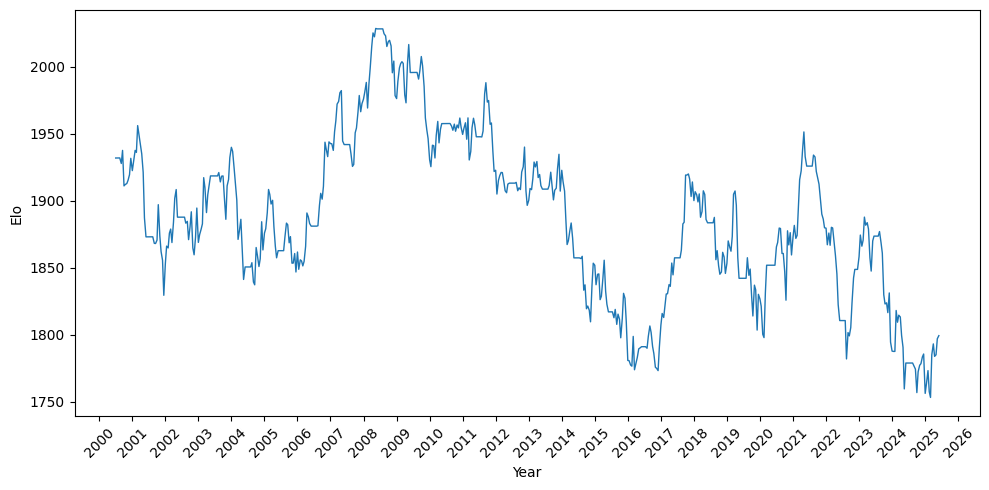

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

mu_df["date"] = pd.to_datetime(mu_df["date"])
mu_df = mu_df.dropna(subset=["date", "elo"])

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(mu_df["date"], mu_df["elo"], linewidth=1)

ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.set_xlabel("Year")
ax.set_ylabel("Elo")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>주요 스텟 - Matches.csv</h2>

In [24]:
df = pd.read_csv("C:\\Users\\ipl1\\Desktop\\IPL\\세미나(25하계)\\data\\Matches.csv")

C:\Users\ipl1\AppData\Local\Temp\ipykernel_1520\1339039892.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\ipl1\\Desktop\\IPL\\세미나(25하계)\\data\\Matches.csv")


In [25]:
df = df.dropna()

In [26]:
df.tail()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
230552,SP2,2025-06-01,17:30:00,Cartagena,Mirandes,1339.21,1544.15,3.0,6.0,7.0,...,2.40,1.8,1.95,1.85,0.0209,0.0118,0.0099,0.8084,0.1386,0.0104
230553,SP2,2025-06-01,17:30:00,Almeria,Tenerife,1544.16,1433.67,4.0,10.0,1.0,...,2.55,-1.8,1.80,2.00,0.3799,0.0630,0.2806,0.0160,0.2332,0.0274
230554,SP2,2025-06-01,17:30:00,La Coruna,Elche,1473.67,1569.98,0.0,3.0,3.0,...,2.63,1.3,1.78,2.03,0.0224,0.7482,0.0100,0.1201,0.0180,0.0813
230555,SP2,2025-06-01,17:30:00,Oviedo,Cadiz,1574.90,1525.76,7.0,13.0,6.0,...,1.51,-0.8,1.95,1.85,0.2070,0.2490,0.2334,0.0211,0.2634,0.0261
230556,SP2,2025-06-01,20:00:00,Cordoba,Albacete,1468.40,1495.25,0.0,4.0,6.0,...,2.70,-1.0,2.00,1.80,0.0191,0.0203,0.0937,0.0164,0.8251,0.0254


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31249 entries, 162577 to 230556
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     31249 non-null  object 
 1   MatchDate    31249 non-null  object 
 2   MatchTime    31249 non-null  object 
 3   HomeTeam     31249 non-null  object 
 4   AwayTeam     31249 non-null  object 
 5   HomeElo      31249 non-null  float64
 6   AwayElo      31249 non-null  float64
 7   Form3Home    31249 non-null  float64
 8   Form5Home    31249 non-null  float64
 9   Form3Away    31249 non-null  float64
 10  Form5Away    31249 non-null  float64
 11  FTHome       31249 non-null  float64
 12  FTAway       31249 non-null  float64
 13  FTResult     31249 non-null  object 
 14  HTHome       31249 non-null  float64
 15  HTAway       31249 non-null  float64
 16  HTResult     31249 non-null  object 
 17  HomeShots    31249 non-null  float64
 18  AwayShots    31249 non-null  float64
 19  Hom

FTResult 특성에 승 패 무 결과 존재 -> 타겟으로 설정 가능

In [28]:
mapping = {"H": 1, "D": 0, "A": -1}
df["FTResult_num"] = df["FTResult"].map(mapping)

<h3>피어슨 상관계수 시각화</h3>

In [29]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [30]:
correlation = (
    df[numeric_cols]
    .corr(method="pearson")["FTResult_num"]
    .drop("FTResult_num")  
    .sort_values(ascending=False)
)

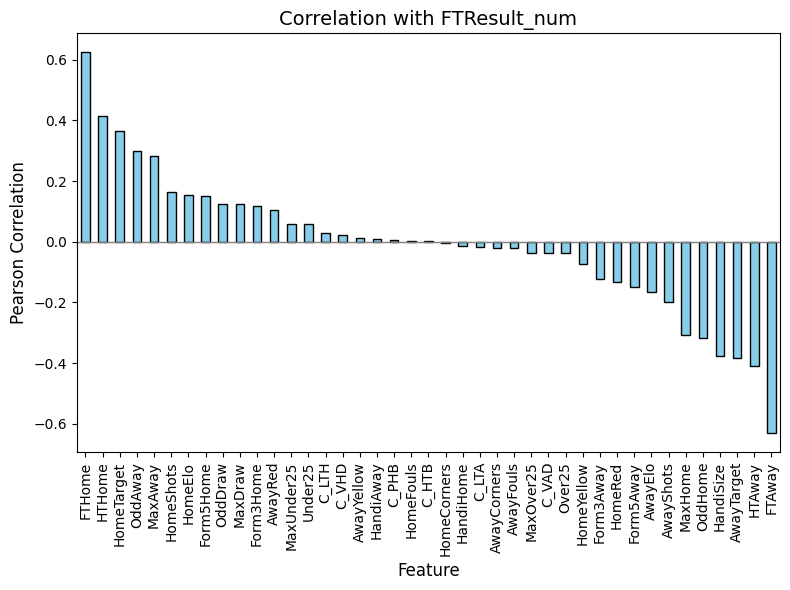

In [31]:
plt.figure(figsize=(8,6))
correlation.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Correlation with FTResult_num", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.axhline(0, color="gray", linewidth=1)  # 0 기준선
plt.tight_layout()
plt.show()

In [69]:
print(correlation)

FTHome         0.623679
HTHome         0.412822
HomeTarget     0.365547
OddAway        0.298852
MaxAway        0.282090
HomeShots      0.165416
HomeElo        0.154666
Form5Home      0.151374
OddDraw        0.125876
MaxDraw        0.125464
Form3Home      0.118891
AwayRed        0.104330
MaxUnder25     0.059234
Under25        0.058272
C_LTH          0.030056
C_VHD          0.022679
AwayYellow     0.013619
HandiAway      0.008382
C_PHB          0.006290
HomeFouls      0.003381
C_HTB          0.001177
HomeCorners   -0.003587
HandiHome     -0.012453
C_LTA         -0.018877
AwayCorners   -0.019782
AwayFouls     -0.019795
MaxOver25     -0.037635
C_VAD         -0.037831
Over25        -0.038040
HomeYellow    -0.074107
Form3Away     -0.121840
HomeRed       -0.134105
Form5Away     -0.149123
AwayElo       -0.166850
AwayShots     -0.199883
MaxHome       -0.307146
OddHome       -0.318513
HandiSize     -0.377738
AwayTarget    -0.382299
HTAway        -0.407622
FTAway        -0.629698
Name: FTResult_n

유의미한 특성 :
FTHome         0.623679
HTHome         0.412822
HomeTarget     0.365547
OddAway        0.298852
MaxAway        0.282090
HomeXG

MaxHome       -0.307146
OddHome       -0.318513
HandiSize     -0.377738
AwayTarget    -0.382299
HTAway        -0.407622
FTAway        -0.629698
AwayXG

<h4>XG값 계산 - XGBoost</h4>

<h5>Home XG</h5>

In [43]:
import xgboost as xgb

In [38]:
features_home = [
    "HomeShots", "HomeTarget", "HomeCorners", "HomeFouls", "HomeYellow", "HomeRed",
    "AwayFouls", "AwayYellow", "AwayRed",
    "HomeElo", "AwayElo", "Form3Home", "Form5Home", "Form3Away", "Form5Away",
    "HandiSize", "HandiHome", "HandiAway",
    "OddHome", "OddDraw", "OddAway"
]

X_home = df[features_home]
y_home = df["FTHome"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_home, y_home, test_size=0.2, random_state=42)

In [46]:
rf_home = RandomForestRegressor(n_estimators=200, random_state=42)
rf_home.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
df["HomeXG"] = rf_home.predict(X_home)

In [58]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid_small = {
    "n_estimators": [300, 500],
    "max_depth": [8, 16],
    "min_samples_split": [5, 7],
    "min_samples_leaf": [2, 4],
}

In [55]:
gs_home = GridSearchCV(
    rf_home,
    param_grid_small,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True,
)

In [59]:
gs_home.fit(X_home, y_home)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 8], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 300]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [60]:
print(gs_home.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [62]:
rf_home = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=8, min_samples_leaf=2, min_samples_split=5)
rf_home.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,8
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
df["HomeXG"] = rf_home.predict(X_home)

<h5>Away XG</h5>

In [49]:
features_away = [
    "AwayShots", "AwayTarget", "AwayCorners", "AwayFouls", "AwayYellow", "AwayRed",
    "HomeFouls", "HomeYellow", "HomeRed",
    "AwayElo", "HomeElo", "Form3Away", "Form5Away", "Form3Home", "Form5Home",
    "HandiSize", "HandiAway", "HandiHome",
    "OddHome", "OddDraw", "OddAway"
]

In [50]:
X_away = df[features_away]
y_away = df["FTAway"]

In [64]:
rf_away = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=8, min_samples_leaf=2, min_samples_split=5)
rf_away.fit(X_away, y_away)

,n_estimators,200
,criterion,'squared_error'
,max_depth,8
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
df["AwayXG"] = rf_away.predict(X_away)

In [67]:
print(df[["FTHome", "HomeXG", "FTAway", "AwayXG"]].corr(method="pearson"))

          FTHome    HomeXG    FTAway    AwayXG
FTHome  1.000000  0.676619 -0.064657 -0.134456
HomeXG  0.676619  1.000000 -0.136367 -0.210330
FTAway -0.064657 -0.136367  1.000000  0.673652
AwayXG -0.134456 -0.210330  0.673652  1.000000


In [ ]:
df.info()